### Exploratory Data Analysis on Car & Snowmobile Dealership on New York State
##### This dataset provides the data about the car, boat and snowmobile dealerships across New York State. It has 14,365 records that contain details on different dealerships including ownership, facility and georeference points.
[Link : Car-Boat-and-Snowmobile-Dealerships-Across-NYS](https://data.ny.gov/Transportation/Car-Boat-and-Snowmobile-Dealerships-Across-NYS/p9e5-nfyh/about_data)


#### Key Columns:
##### Facility Name, Facility Street, City, Zip Code, County, Owner Name, Business Type, Orginal Issuance Date, Last Renewal Date, Expiration Date, Georeference.

#### Step 1: Importing Necessary libraries

In [211]:
# Importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Icon

#### Step 1: Load the dataset into Pandas Dataframe

In [213]:
# Load the dataset
file_path = "Car__Boat__and_Snowmobile_Dealerships_Across_NYS_20240913.csv"
df = pd.read_csv(file_path)

#### Step 2: Understand the Dataset

In [215]:
# Displays first few rows of the dataset
df.head()

,Facility #,Facility Name,Facility Name Overflow,Facility Street,Facility City,Facility State,Facility Zip Code,Facility County,Owner Name,Owner Name Overflow,Business Type,Original Issuance Date,Last Renewal Date,Expiration Date,Georeference
0,7130726,2ND AVE AUTO FIX LLC,NaN,105 SECOND AVE,ALBANY,NY,12202,ALBA,SEEMA GUL,NaN,DLU,01/12/2023,NaN,12/31/2024,POINT (-73.765556139 42.639040687)
1,7127552,518 MOTORSPORTS LLC,NaN,170 CATHERINE STREET,ALBANY,NY,12202,ALBA,PEDRO CEDENO MARTE,NaN,DLU,11/04/2020,10/07/2022,10/31/2024,POINT (-73.766017038 42.643406335)
2,7001863,ABELE TRACTOR&EQUIP,CO INC,72 EVERETT RD,ALBANY,NY,12205,ALBA,RODNEY ABELE,NaN,DLU,11/13/1980,08/08/2023,08/31/2025,POINT (-73.77675302 42.692192766)
3,7113007,ACCESS AUTO SALES,NaN,68 FULLER ROAD,ALBANY,NY,12205,ALBA,JOSEPH A LOMBARDI,NaN,DLB,10/24/2011,08/02/2023,09/30/2025,POINT (-73.822246051 42.69899028)
4,7113007,ACCESS AUTO SALES,NaN,68 FULLER ROAD,ALBANY,NY,12205,ALBA,JOSEPH A LOMBARDI,NaN,DLU,10/24/2011,08/02/2023,09/30/2025,POINT (-73.822246051 42.69899028)


In [216]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14365 entries, 0 to 14364
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Facility #              14365 non-null  int64 
 1   Facility Name           14365 non-null  object
 2   Facility Name Overflow  6753 non-null   object
 3   Facility Street         14365 non-null  object
 4   Facility City           14365 non-null  object
 5   Facility State          14365 non-null  object
 6   Facility Zip Code       14365 non-null  int64 
 7   Facility County         14365 non-null  object
 8   Owner Name              14365 non-null  object
 9   Owner Name Overflow     2010 non-null   object
 10  Business Type           14365 non-null  object
 11  Original Issuance Date  14365 non-null  object
 12  Last Renewal Date       13082 non-null  object
 13  Expiration Date         14365 non-null  object
 14  Georeference            14364 non-null  object
dtypes:

In [217]:
# To display summary statistics for numeric columns
df.describe()

,Facility #,Facility Zip Code
count,1.436500e+04,14365.000000
mean,6.883756e+06,12848.737765
std,8.607121e+05,1327.424516
min,1.300012e+06,6390.000000
25%,7.059334e+06,11751.000000
50%,7.102555e+06,13021.000000
75%,7.121405e+06,14094.000000
max,7.133222e+06,14919.000000


In [218]:
# To display the names of all columns
df.columns

Index(['Facility #', 'Facility Name', 'Facility Name Overflow',
       'Facility Street', 'Facility City', 'Facility State',
       'Facility Zip Code', 'Facility County', 'Owner Name ',
       'Owner Name Overflow', 'Business Type', 'Original Issuance Date',
       'Last Renewal Date', 'Expiration Date', 'Georeference'],
      dtype='object')

In [219]:
# To check any missing values are present in the columns
missing_values = df.isnull().sum()
print(missing_values)

Facility #                    0
Facility Name                 0
Facility Name Overflow     7612
Facility Street               0
Facility City                 0
Facility State                0
Facility Zip Code             0
Facility County               0
Owner Name                    0
Owner Name Overflow       12355
Business Type                 0
Original Issuance Date        0
Last Renewal Date          1283
Expiration Date               0
Georeference                  1
dtype: int64


In [220]:
# Used to drop duplicate rows, if any
df = df.drop_duplicates()
print(df)

       Facility #         Facility Name Facility Name Overflow  \
0         7130726  2ND AVE AUTO FIX LLC                    NaN   
1         7127552   518 MOTORSPORTS LLC                    NaN   
2         7001863   ABELE TRACTOR&EQUIP                 CO INC   
3         7113007     ACCESS AUTO SALES                    NaN   
4         7113007     ACCESS AUTO SALES                    NaN   
...           ...                   ...                    ...   
14360     7090788     TORREY AUTO SALES                    INC   
14361     7030357    VILLAGE AUTO WORKS                    NaN   
14362     7128126        FLX MOTORS LLC                    NaN   
14363     7122914     MURPHY MECHANICAL        AND MACHINE LLC   
14364     5620002  RUSHVILLE MOTORS INC                    NaN   

            Facility Street Facility City Facility State  Facility Zip Code  \
0            105 SECOND AVE        ALBANY             NY              12202   
1      170 CATHERINE STREET        ALBANY        

In [221]:
# To handle missing values (could drop or impute, depending on context)
#df = df.dropna() 

In [222]:
# Check the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14365 entries, 0 to 14364
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Facility #              14365 non-null  int64 
 1   Facility Name           14365 non-null  object
 2   Facility Name Overflow  6753 non-null   object
 3   Facility Street         14365 non-null  object
 4   Facility City           14365 non-null  object
 5   Facility State          14365 non-null  object
 6   Facility Zip Code       14365 non-null  int64 
 7   Facility County         14365 non-null  object
 8   Owner Name              14365 non-null  object
 9   Owner Name Overflow     2010 non-null   object
 10  Business Type           14365 non-null  object
 11  Original Issuance Date  14365 non-null  object
 12  Last Renewal Date       13082 non-null  object
 13  Expiration Date         14365 non-null  object
 14  Georeference            14364 non-null  object
dtypes:

In [223]:
print(df)

       Facility #         Facility Name Facility Name Overflow  \
0         7130726  2ND AVE AUTO FIX LLC                    NaN   
1         7127552   518 MOTORSPORTS LLC                    NaN   
2         7001863   ABELE TRACTOR&EQUIP                 CO INC   
3         7113007     ACCESS AUTO SALES                    NaN   
4         7113007     ACCESS AUTO SALES                    NaN   
...           ...                   ...                    ...   
14360     7090788     TORREY AUTO SALES                    INC   
14361     7030357    VILLAGE AUTO WORKS                    NaN   
14362     7128126        FLX MOTORS LLC                    NaN   
14363     7122914     MURPHY MECHANICAL        AND MACHINE LLC   
14364     5620002  RUSHVILLE MOTORS INC                    NaN   

            Facility Street Facility City Facility State  Facility Zip Code  \
0            105 SECOND AVE        ALBANY             NY              12202   
1      170 CATHERINE STREET        ALBANY        

#### Univariate Analysis
##### 1. Comparing the Dealership type

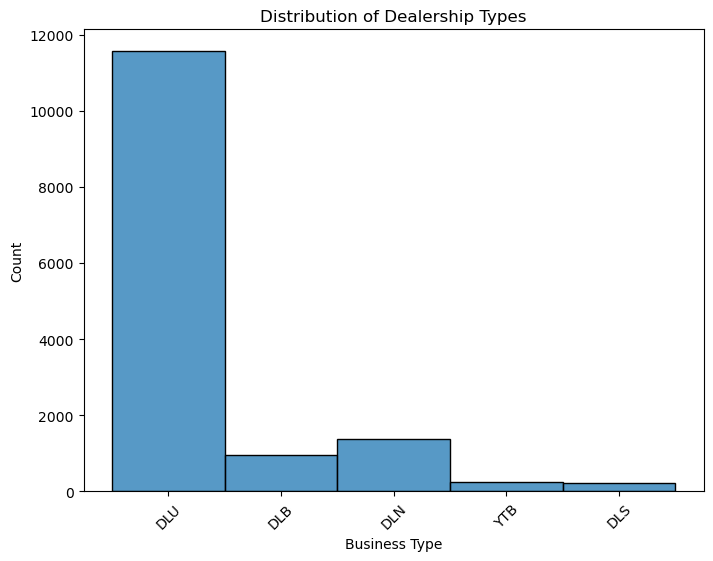

In [262]:
# Analyze 'dealer_type'
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Business Type')
plt.title('Distribution of Dealership Types')
plt.xticks(rotation=45)
plt.show()

##### 2.Counting the Number of Facilities by County

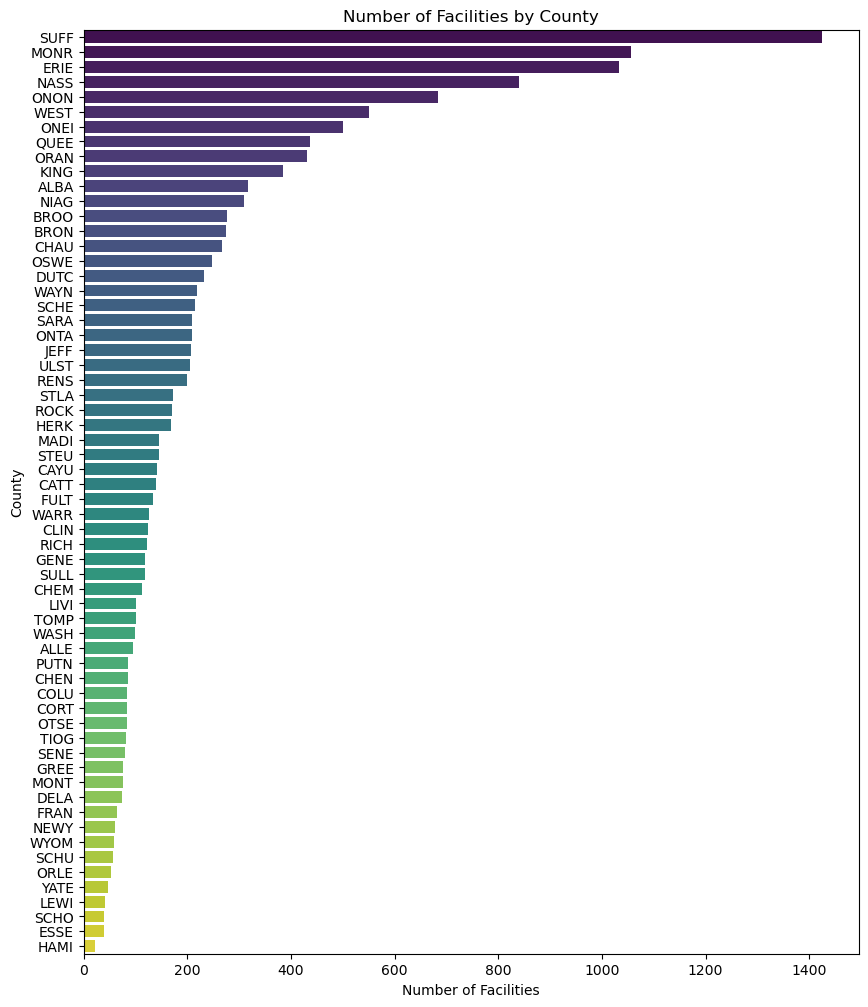

In [227]:
# Count facilities by county
county_counts = df['Facility County'].value_counts()

# Create a bar plot to show the distribution of facilities by county
plt.figure(figsize=(10,12))
sns.barplot(y=county_counts.index, x=county_counts.values, palette='viridis',hue=county_counts.index)
plt.title('Number of Facilities by County')
plt.xlabel('Number of Facilities')
plt.ylabel('County')
plt.show()

##### 3. Distribution of Facilities Expiration by Year and Month

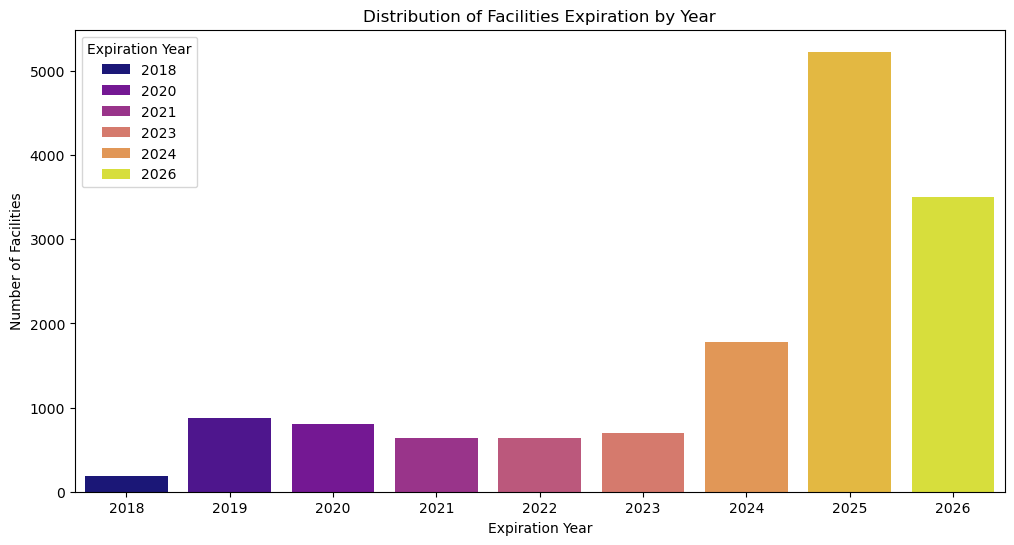

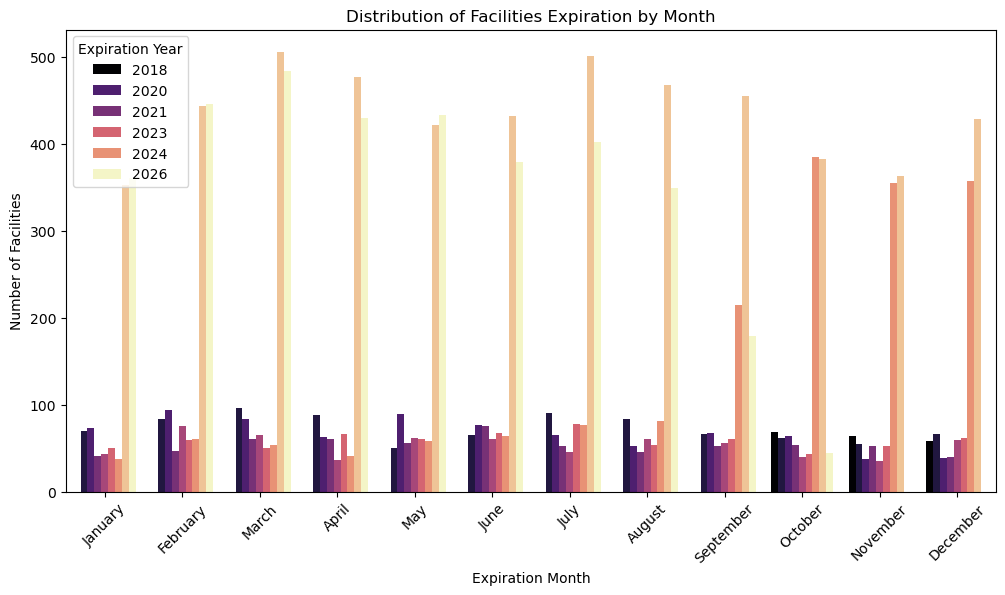

In [278]:

# Convert the 'Expiration Date' column to datetime
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

# Drop any rows where expiration date is NaT (Not a Time)
df = df.dropna(subset=['Expiration Date'])

# Extract the year and month of expiration
df['Expiration Year'] = df['Expiration Date'].dt.year
df['Expiration Month'] = df['Expiration Date'].dt.month_name()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'Expiration Month' to a categorical type with the specified order
df['Expiration Month'] = pd.Categorical(df['Expiration Month'], categories=month_order, ordered=True)

# Create a bar plot to visualize expiration by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Expiration Year', data=df, palette='plasma', hue='Expiration Year')
plt.title('Distribution of Facilities Expiration by Year')
plt.xlabel('Expiration Year')
plt.ylabel('Number of Facilities')
plt.show()

# Create a bar plot to visualize expiration by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Expiration Month', data=df, palette='magma', hue='Expiration Year')
plt.title('Distribution of Facilities Expiration by Month')
plt.xlabel('Expiration Month')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)
plt.show()


#### Bivariate Analysis
##### 1.Comparing top 10 owners by number of facilities

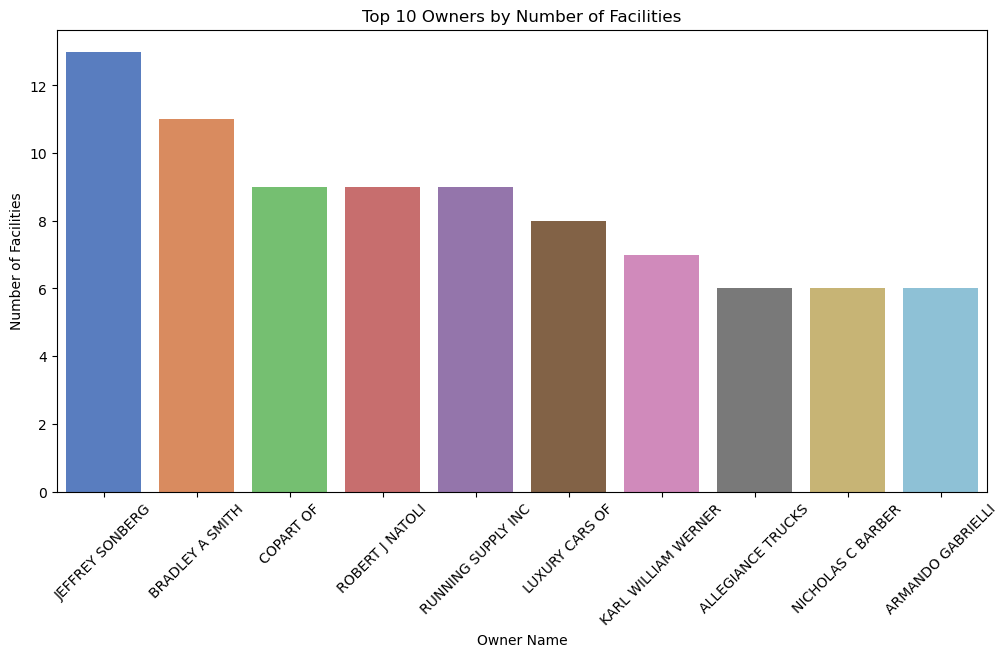

In [280]:
# Count facilities by owner
owner_counts = df['Owner Name '].value_counts()

# Create a new DataFrame with the top 10 owners by number of facilities
top_owners = owner_counts.head(10).reset_index()
top_owners.columns = ['Owner Name', 'Number of Facilities']

# Create a bar chart for the top 10 owners with the most facilities
plt.figure(figsize=(12,6))
sns.barplot(x='Owner Name', y='Number of Facilities', hue='Owner Name', data=top_owners, palette='muted')
plt.title('Top 10 Owners by Number of Facilities')
plt.xlabel('Owner Name')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45)
plt.show()


#### Georeference Visualization
##### 1.Displaying the top 10 owners' facilities in Geographical map

In [288]:
# Extract the 'Georeference' column
points = df['Georeference']

# Initialize empty lists to store latitudes and longitudes
longitudes = []
latitudes = []

# Loop through each point in the 'Georeference' column
for point in points:
    if isinstance(point, str) and point.startswith('POINT'):
        # Clean the point string by removing 'POINT (' and ')'
        new_point = point.replace('POINT (', '').replace(')', '')
        # Split the cleaned string into longitude and latitude
        longitude, latitude = map(float, new_point.split())
        longitudes.append(longitude)
        latitudes.append(latitude)
    else:
        longitudes.append(None)
        latitudes.append(None)

# Add the latitude and longitude as new columns in the DataFrame
df['Longitude'] = longitudes
df['Latitude'] = latitudes

# Step 1: Group by 'Owner Name' and count the number of facilities
top_owners = df['Owner Name '].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to include only the top 10 owners
df_top_owners = df[df['Owner Name '].isin(top_owners)]

# Step 3: Create a list of colors (one for each owner)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cadetblue', 'lightblue', 'black', 'gray']

# Map each owner to a color
owner_colors = dict(zip(top_owners, colors))

# Step 4: Calculate the average latitude and longitude for the map center
map_center_lat = df_top_owners['Latitude'].mean()
map_center_lon = df_top_owners['Longitude'].mean()

# Step 5: Create the base map
m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=10)

# Step 6: Add markers for each facility owned by the top 10 owners
for idx, row in df_top_owners.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        # Assign a color based on the owner
        owner_color = owner_colors[row['Owner Name ']]
        
        # Create a marker with the owner's specific color
        folium.Marker(
            location=[row['Latitude'], row['Longitude']], 
            popup=f"Owner: {row['Owner Name ']}<br>Facility: {row['Facility Name']}",
            icon=Icon(color=owner_color)
        ).add_to(m)

# Display the map
m

#### Summary & Findings:
##### 1. Dealer License-Used (DLU) type dealerships has the highest count of any dealership type, with 11,560 dealerships.
##### 2. Suffolk County (SUFF) has the highest number of dealership facilities, with 1424 facilities in it.
##### 3. Most of the facilities dealership expires in the month of April, 2025.
##### 4. Jeffrey Sonberg has the highest number of facilities, with 13 facilities under his name.
##### 5. Plotted a geogaphical map of the location of the top 10 owners' facilities.